# 1. Load dataset
#### In this assignment, you are expected to build a decision tree model that classifies a toy dataset.
#### You will need to read the data from the file (data.csv). It contains 15000 samples and two features for each sample.

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("C:/Users/ACER/Downloads/data.csv",header=None)
df

,0,1,2
0,10182.554999,-371.830691,100.0
1,-8493.323486,7009.446179,0.0
2,21322.088204,-390.558362,100.0
3,5473.925002,-1878.223941,0.0
4,-7422.540710,5291.351276,0.0
...,...,...,...
14995,-7273.210307,5827.740028,0.0
14996,16408.532323,1111.727000,100.0
14997,-7732.465058,14232.038118,0.0
14998,6249.812673,6541.827106,0.0


In [3]:
df.shape

(15000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15000 non-null  float64
 1   1       15000 non-null  float64
 2   2       15000 non-null  float64
dtypes: float64(3)
memory usage: 351.7 KB


In [5]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

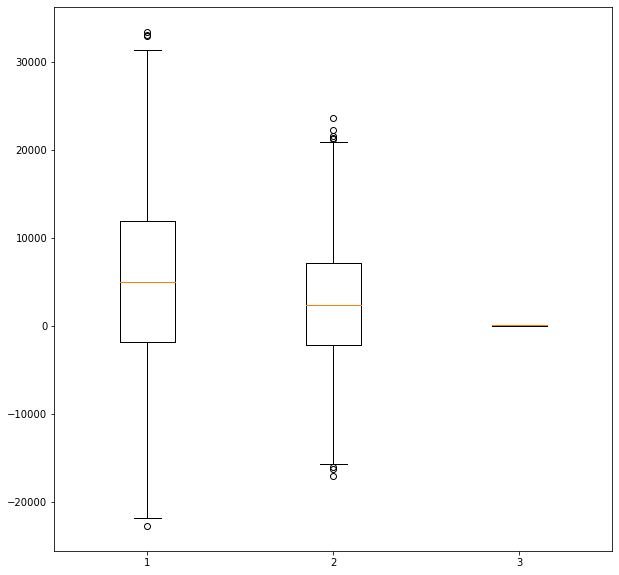

In [6]:
import matplotlib.pyplot as plt 

fig=plt.figure(figsize=(10,10))
plt.boxplot(df)
plt.show()

In [7]:
df[0]

0        10182.554999
1        -8493.323486
2        21322.088204
3         5473.925002
4        -7422.540710
             ...     
14995    -7273.210307
14996    16408.532323
14997    -7732.465058
14998     6249.812673
14999   -16979.611468
Name: 0, Length: 15000, dtype: float64

In [8]:
# remove outliers 
Q1 = df[0].quantile(q=0.25)
Q3 = df[0].quantile(q=0.75)
IQR = Q3-Q1
# remove outliers
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5*IQR
outliers = [(df[0] > ul) | (df[0] < ll)]
df.drop(df[(df[0] > ul) | (df[0] < ll) ].index , inplace=True)

In [9]:
df.shape

(14996, 3)

In [10]:
Q1 = df[1].quantile(q=0.25)
Q3 = df[1].quantile(q=0.75)
IQR = Q3-Q1
# remove outliers
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5*IQR
outliers = [(df[1] > ul) | (df[1] < ll)]
df.drop(df[(df[1] > ul) | (df[1] < ll) ].index , inplace=True)

In [11]:
df.shape

(14988, 3)

In [12]:
df.corr()

,0,1,2
0,1.000000,-0.318783,0.521926
1,-0.318783,1.000000,-0.613191
2,0.521926,-0.613191,1.000000


<AxesSubplot:>

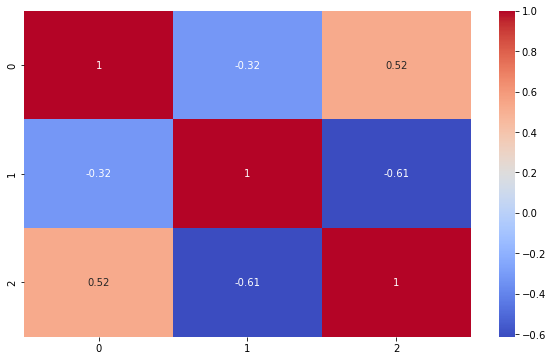

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [14]:
df.describe()

,0,1,2
count,14988.000000,14988.000000,14988.000000
mean,4980.916183,2472.925157,49.993328
std,9541.419067,6302.601543,50.001668
min,-21843.802069,-15709.428336,0.000000
25%,-1870.390611,-2159.961278,0.000000
50%,5018.616687,2404.936991,0.000000
75%,11879.246402,7092.984659,100.000000
max,31419.830599,20896.634363,100.000000


# 2. Prepare dataset
#### Split the data into train and test sets.

In [15]:
from sklearn.model_selection import train_test_split
X=df.drop(2,axis=1)
Y=df[2]
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [16]:
X_train.shape

(11241, 2)

In [17]:
y_test.shape

(3747,)

# 3. Modeling
#### Train a decision tree classifier on the data. You can use DecisionTreeClassifier. Use grid search to tune the hyperparameters.

In [18]:
# decision tree model 
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

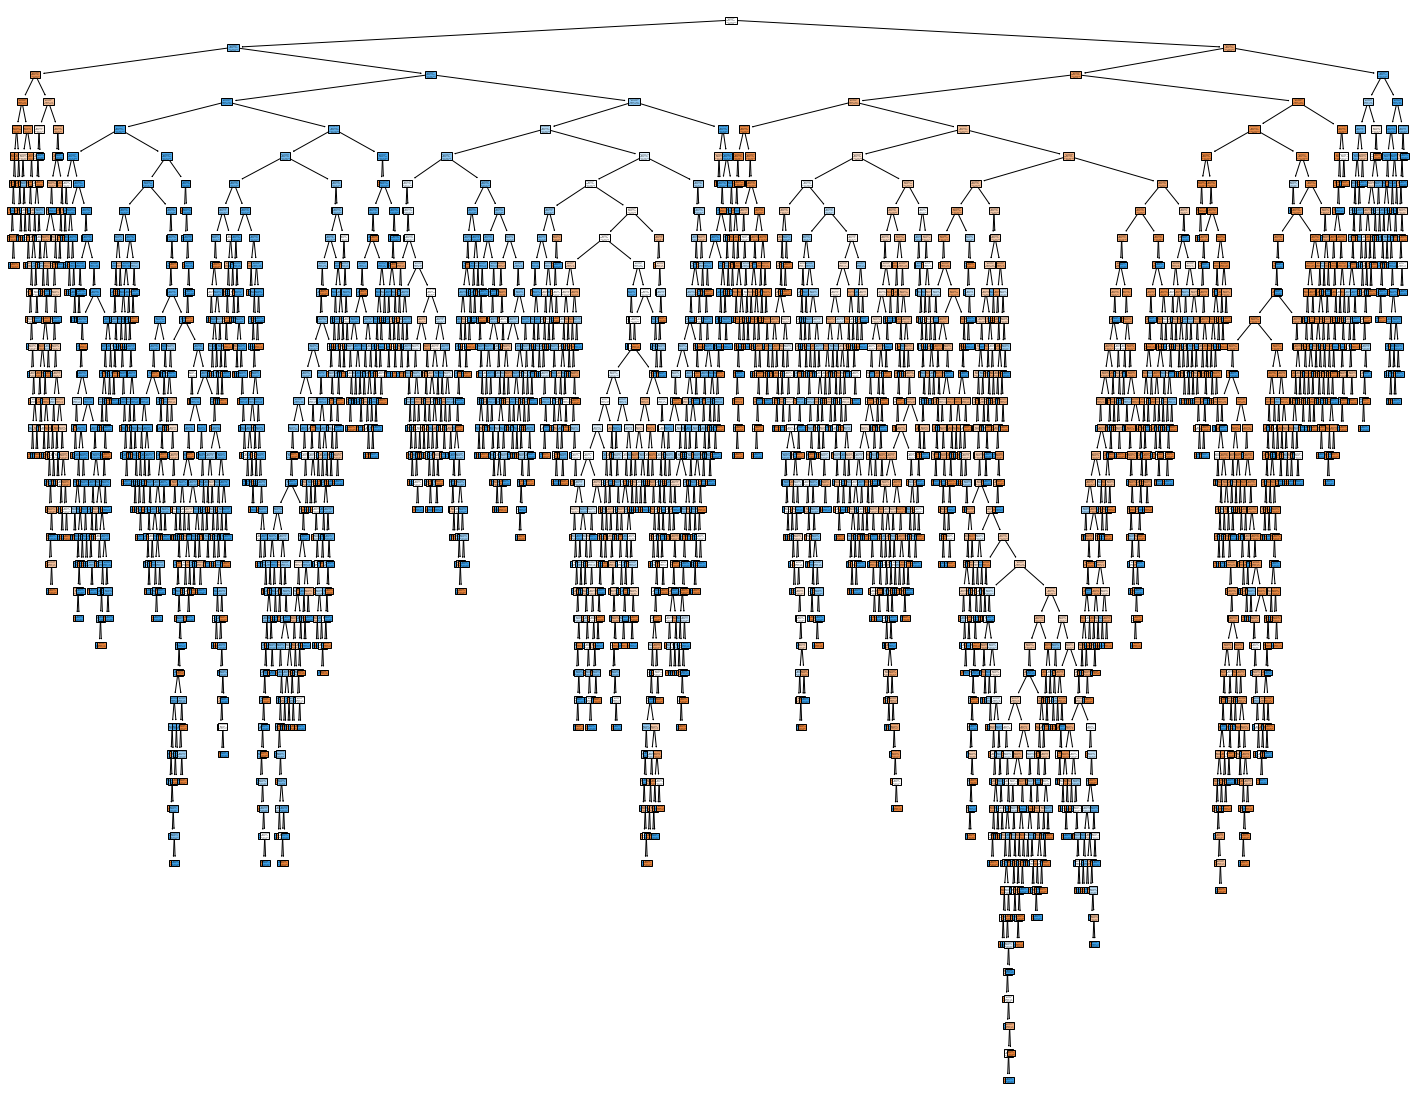

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(dt_model,
                   feature_names=X_train.columns,
                   class_names=['0', "100"],
                   filled=True)

In [19]:
dt_model.score(X_train,y_train)

1.0

In [20]:
dt_model.score(X_test,y_test)

0.8062449959967974

In [21]:
prediction = dt_model.predict(X_test)
y_pred = prediction

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8062449959967974

In [23]:
# use hyperparameter tuning to find the best parameters for our model 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
X=df.drop(2,axis=1)
Y=df[2]
model_dt = DecisionTreeClassifier()

In [37]:
# https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680 


In [24]:
param_grid = {"max_depth":[2,4,6,8,10,12],"max_features":[1,2,3],'criterion':["gini",'entropy']}

In [39]:
#"min_samples_leaf":[1,2,3,4],'min_samples_split': [1,2,3], 

In [25]:
g_search = GridSearchCV(estimator = model_dt, param_grid = param_grid, cv = 10, return_train_score=True)
g_search.fit(X,Y);
print(g_search.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 2}


In [26]:
g_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=2)

In [159]:
classifier = DecisionTreeClassifier(max_depth = 2,max_features=2, criterion = "entropy",random_state=1,splitter='best')
classifier.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=2,
                       random_state=1)

In [27]:
y_pred

array([  0.,   0.,   0., ..., 100., 100., 100.])

In [28]:
y_pred = g_search.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.866293034427542

#### Train the best model you found on the whole train set (do you need to?) and evaluate the model on the test set.

In [ ]:
# we don't need that because grid search found the best ones for our model

#### Generate 1,500 subsets of the training set, each containing 100 randomly chosen instances. You can use ShuffleSplit.

In [29]:
len(X_train)

11241

In [30]:
X_train

,0,1
12762,13079.084024,-480.400442
2706,6271.163178,-9937.514873
6617,2231.992512,9047.775357
5509,-1033.695451,4283.100646
10878,-12596.793648,-1105.872888
...,...,...
905,-5534.683069,11773.298757
5197,6341.013762,2235.750642
12182,-6251.225485,7895.836056
235,4771.516597,1338.013385


In [31]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1500
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train.iloc[mini_train_index]
    y_mini_train = y_train.iloc[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

#### Train one tree on each subset, using the best model you previously found. Evaluate the performance of the trees using the test set. Did you get lower or higher accuracy?

In [32]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score
forest = [clone(g_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8137261809447558

#### For each instance in the test set, predict its class using 1200 trees, and keep only the most frequent prediction. Evaluate these predictions. Did you get lower or higher accuracy?

In [67]:
prediction = np.empty([1200, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    prediction[tree_index] = tree.predict(X_test)   # return error 

IndexError: index 1200 is out of bounds for axis 0 with size 1200

In [68]:
prediction = np.empty([1200, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    prediction[:tree_index+1] = tree.predict(X_test) # accuracy rate is 82.5 therefore I'm not sure 

In [69]:
from scipy.stats import mode
y_pred_majority_votes, n_votes = mode(prediction, axis=0)

In [70]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8254603682946358

In [64]:
last_prediction = np.empty([1200, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    if tree_index<1200:
        last_prediction[tree_index] = tree.predict(X_test)

In [65]:
from scipy.stats import mode
y_pred_majority_votes, n_votes = mode(last_prediction, axis=0)

In [66]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8654923939151321